In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyod.models.knn import KNN
from pyod.utils.data import generate_data

In [3]:
# Generate synthetic data
contamination = 0.1  # percentage of outliers
n_train = 200  # number of training points
n_test = 100  # number of testing points
X_train, X_test, y_train, y_test = generate_data(n_train=n_train, n_test=n_test, n_features=2, contamination=contamination, random_state=42)


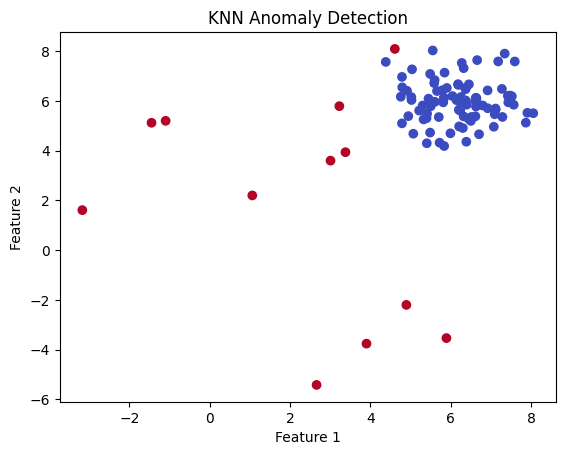

In [4]:
# Train KNN detector
clf = KNN()
clf.fit(X_train)

# Get the prediction labels and outlier scores for the test data
y_test_pred = clf.predict(X_test)  # binary labels (0: inliers, 1: outliers)
y_test_scores = clf.decision_function(X_test)  # raw outlier scores

# Plot the results
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test_pred, cmap='coolwarm')
plt.title('KNN Anomaly Detection')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

Training: 100%|██████████| 100/100 [00:00<00:00, 138.50it/s]


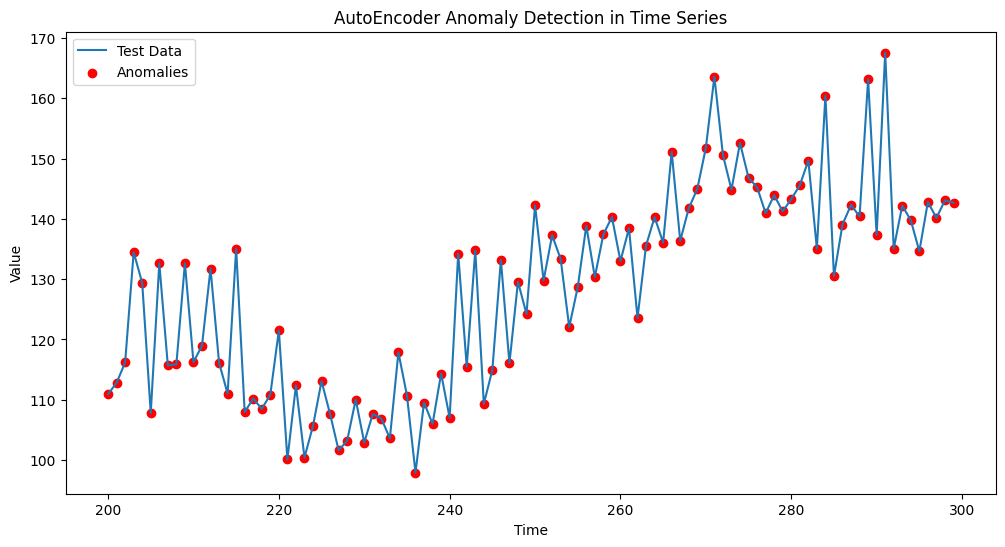

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyod.models.auto_encoder import AutoEncoder
from pyod.utils.data import generate_data

# Generate synthetic time series data
np.random.seed(42)
time_series_length = 300
contamination = 0.1  # percentage of outliers

# Create a time series with a trend and some noise
time = np.arange(time_series_length)
series = 0.5 * time + 10 * np.sin(0.1 * time) + np.random.normal(0, 5, time_series_length)

# Introduce anomalies
n_anomalies = int(contamination * time_series_length)
anomaly_indices = np.random.choice(time_series_length, n_anomalies, replace=False)
series[anomaly_indices] += np.random.normal(20, 5, n_anomalies)

# Reshape the data for the AutoEncoder
X = series.reshape(-1, 1)

# Split the data into training and testing sets
n_train = 200
X_train, X_test = X[:n_train], X[n_train:]

# Train the AutoEncoder detector
clf = AutoEncoder(hidden_neuron_list=[64,32,64], epoch_num=100, contamination=contamination)

clf.fit(X_train)

# Get the prediction labels and outlier scores for the test data
y_test_pred = clf.predict(X_test)  # binary labels (0: inliers, 1: outliers)
y_test_scores = clf.decision_function(X_test)  # raw outlier scores

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(time[n_train:], X_test, label='Test Data')
plt.scatter(time[n_train:][y_test_pred == 1], X_test[y_test_pred == 1], color='red', label='Anomalies')
plt.title('AutoEncoder Anomaly Detection in Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


Training: 100%|██████████| 200/200 [00:05<00:00, 33.46it/s]


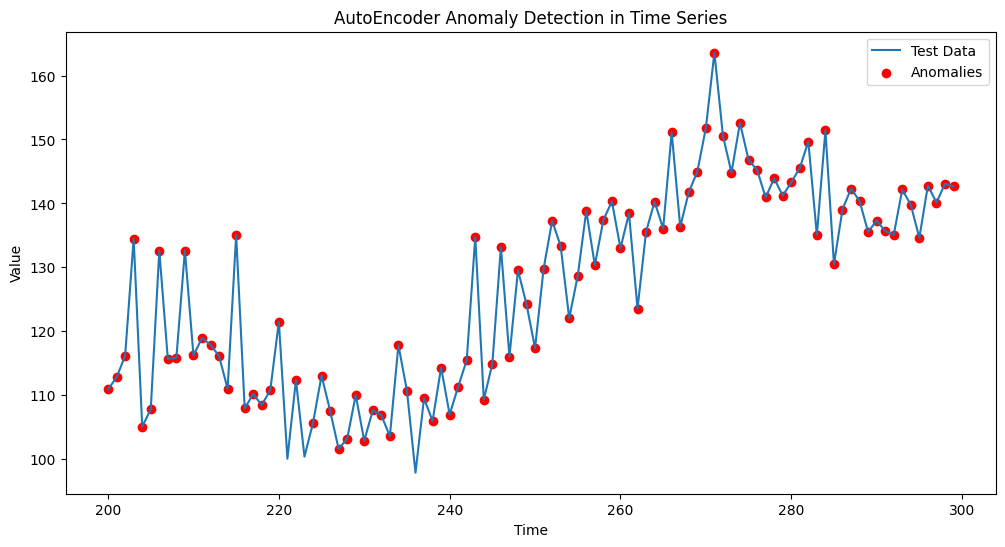

In [14]:
# Generate synthetic time series data
np.random.seed(42)
time_series_length = 300
contamination = 0.05  # Lower percentage of outliers

# Create a time series with a trend and some noise
time = np.arange(time_series_length)
series = 0.5 * time + 10 * np.sin(0.1 * time) + np.random.normal(0, 5, time_series_length)

# Introduce anomalies
n_anomalies = int(contamination * time_series_length)
anomaly_indices = np.random.choice(time_series_length, n_anomalies, replace=False)
series[anomaly_indices] += np.random.normal(20, 5, n_anomalies)

# Reshape the data for the AutoEncoder
X = series.reshape(-1, 1)

# Split the data into training and testing sets
n_train = 200
X_train, X_test = X[:n_train], X[n_train:]

# Train the AutoEncoder detector
clf = AutoEncoder(hidden_neuron_list=[128,64,32,64,34,16,8], epoch_num=200, contamination=contamination, batch_size=16, dropout_rate=0.5)
clf.fit(X_train)

# Get the prediction labels and outlier scores for the test data
y_test_pred = clf.predict(X_test)  # binary labels (0: inliers, 1: outliers)
y_test_scores = clf.decision_function(X_test)  # raw outlier scores

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(time[n_train:], X_test, label='Test Data')
plt.scatter(time[n_train:][y_test_pred == 1], X_test[y_test_pred == 1], color='red', label='Anomalies')
plt.title('AutoEncoder Anomaly Detection in Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


In [15]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_neuron_list': [[64, 32], [128, 64, 32], [128, 64, 32, 64, 34, 16, 8]],
    'epochs': [50, 100, 200],
    'batch_size': [16, 32],
    'dropout_rate': [0.1, 0.2, 0.3]
}

grid_search = GridSearchCV(estimator=AutoEncoder(contamination=0.05), param_grid=param_grid, scoring='f1', cv=3)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_


ValueError: Invalid parameter epochs for estimator AutoEncoder(batch_norm=True, batch_size=16, compile_mode='default',
      contamination=0.05, device=device(type='cpu'), dropout_rate=0.1,
      epoch_num=10, hidden_activation_name='relu',
      hidden_neuron_list=[64, 32], lr=0.001, optimizer_name='adam',
      optimizer_params={'weight_decay': 1e-05}, preprocessing=True,
      random_state=42, use_compile=False, verbose=1). Check the list of available parameters with `estimator.get_params().keys()`.